In [1]:
from sklearn.feature_extraction.text import CountVectorizer

In [93]:
cv=CountVectorizer(ngram_range=(2,3))
text="Arham khan is a good boy"
X=cv.fit([text])
cv.vocabulary_

{'arham khan': 0,
 'khan is': 5,
 'is good': 3,
 'good boy': 2,
 'arham khan is': 1,
 'khan is good': 6,
 'is good boy': 4}

In [94]:
corpus=[
    "Arham khan was eating pizza",
    "Taimoor was a good boy",
    "thor eat burger",
    "hulk swallowing something different"
]

In [95]:
import spacy
nlp_Pipeline=spacy.load("en_core_web_sm")
def Preprocess(sent):
    tokenize_doc=nlp_Pipeline(sent)
    sent_lm=[token.lemma_ for token in tokenize_doc if not token.is_punct and not token.is_stop] #Apply Lemmatization
    return ' '.join(sent_lm) 

In [20]:
corpus_processed=[Preprocess(sent) for sent in corpus]

In [21]:
corpus_processed

['Arham khan eat pizza',
 'taimoor good boy',
 'thor eat burger',
 'hulk swallow different']

In [22]:
X=cv.fit(corpus_processed)

In [23]:
X.vocabulary_

{'arham': 0,
 'khan': 12,
 'eat': 5,
 'pizza': 14,
 'arham khan': 1,
 'khan eat': 13,
 'eat pizza': 7,
 'taimoor': 17,
 'good': 8,
 'boy': 2,
 'taimoor good': 18,
 'good boy': 9,
 'thor': 19,
 'burger': 3,
 'thor eat': 20,
 'eat burger': 6,
 'hulk': 10,
 'swallow': 15,
 'different': 4,
 'hulk swallow': 11,
 'swallow different': 16}

In [24]:
X.transform(["Hooria is friend of Arham"]).toarray()

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [25]:
import pandas as pd
df=pd.read_json("news_dataset.json")

In [26]:
df.head()

,text,category
0,Watching Schrödinger's Cat Die University of C...,SCIENCE
1,WATCH: Freaky Vortex Opens Up In Flooded Lake,SCIENCE
2,Entrepreneurs Today Don't Need a Big Budget to...,BUSINESS
3,These Roads Could Recharge Your Electric Car A...,BUSINESS
4,Civilian 'Guard' Fires Gun While 'Protecting' ...,CRIME


In [28]:
df.category.value_counts()

category
BUSINESS    4254
SPORTS      4167
CRIME       2893
SCIENCE     1381
Name: count, dtype: int64

In [29]:
df.isnull().sum()

text        0
category    0
dtype: int64

In [35]:
df_bs=df[df.category == "BUSINESS"]
df_sp=df[df.category == "SPORTS"]
df_c=df[df.category == "CRIME"]
df_s=df[df.category == "SCIENCE"]
df_bs=df_bs.sample(df_s.shape[0])
df_sp=df_sp.sample(df_s.shape[0])
df_c=df_c.sample(df_s.shape[0])
df=pd.concat([df_c,df_sp,df_bs,df_s])

In [36]:
df.category.value_counts()

category
CRIME       1381
SPORTS      1381
BUSINESS    1381
SCIENCE     1381
Name: count, dtype: int64

In [39]:
df["category_num"]=df['category'].apply(lambda x : 0 if x == "BUSINESS" else 1 if x == "CRIME" else 2 if x == "SCIENCE" else 3 if x == "SPORTS" else "no")

In [41]:
df.category_num.value_counts()

category_num
1    1381
3    1381
0    1381
2    1381
Name: count, dtype: int64

In [57]:
df['text_preprocess']=df['text'].apply(Preprocess)

In [58]:
df.head()

,text,category,category_num,text_preprocess
7982,Suspect In Murder Of Pregnant Mother Added To ...,CRIME,1,suspect murder Pregnant Mother add FBI Wanted ...
10214,The Inevitable Happens After Man Drives Drunk ...,CRIME,1,inevitable Happens man drive Drunk Police Job ...
4300,Suspect In Murder Of Louisiana Cop Arrested Af...,CRIME,1,suspect murder Louisiana Cop arrest Manhunt su...
273,Bodies Of Missing California Veteran And Dog B...,CRIME,1,body miss California Veteran Dog Believed Foun...
3826,Human Remains Found In Search For Hannah Graham,CRIME,1,human remain find Search Hannah Graham


In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.text_preprocess,df.category_num,test_size=0.2,random_state=42,stratify=df.category_num)

In [129]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

clf=Pipeline(
    [
        ("Vectorizer",CountVectorizer(ngram_range=(1,2))),
        ("NaiveBaysClassifier",MultinomialNB())
    ]
)

In [130]:
clf=clf.fit(X_train,y_train)

In [131]:
y_pred=clf.predict(X_test)

In [132]:
import numpy as np

print("Unique values in y_test:", np.unique(y_test))
print("Unique values in y_pred:", np.unique(y_pred))

Unique values in y_test: [0 1 2 3]
Unique values in y_pred: [0 1 2 3]


In [133]:
y_pred.shape,y_test.shape

((1105,), (1105,))

In [134]:
import seaborn as sn
import matplotlib.pyplot as plt
def Evaluator(model,X_train,Y_train,X_test,Y_test):
    Y_pred=model.predict(X_test)

    accuracy= accuracy_score(y_test, y_pred)
    pred = precision_score(y_test, y_pred, average='weighted', labels=[0, 1, 2, 3])
    rec = recall_score(y_test, y_pred, average='weighted', labels=[0, 1, 2, 3])
    f1 = f1_score(y_test, y_pred, average='weighted', labels=[0, 1, 2, 3])

    print(
          f"Accuracy : {accuracy}\nPrecision : {pred}\nRecall : {rec}\nF1-Score : {f1}" )
    print(classification_report(Y_test,Y_pred))
    cm=confusion_matrix(Y_test,Y_pred)
    plt.figure(figsize=(10,7))
    sn.heatmap(cm,annot=True)
    plt.show()

Accuracy : 0.8769230769230769
Precision : 0.880927369235449
Recall : 0.8769230769230769
F1-Score : 0.8774479254339643
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       276
           1       0.85      0.91      0.88       276
           2       0.91      0.83      0.87       277
           3       0.95      0.87      0.91       276

    accuracy                           0.88      1105
   macro avg       0.88      0.88      0.88      1105
weighted avg       0.88      0.88      0.88      1105



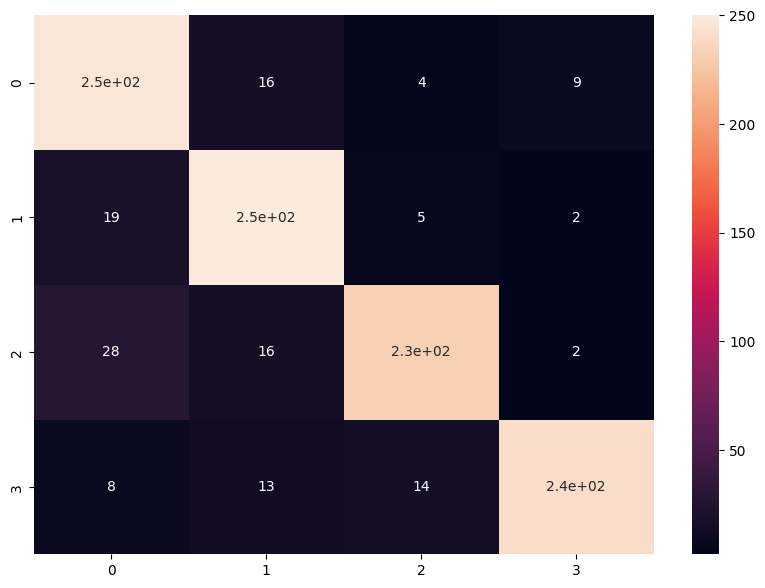

In [135]:
Evaluator(clf,X_train,y_train,X_test,y_test)